In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [3]:
data_dir = '../kaggle_data/'

In [4]:
kaggle_train = data_dir+'train.csv'

In [5]:
df = pd.read_csv(kaggle_train)
#df_train,df_cv = train_test_split(pd.read_csv(kaggle_train))

In [6]:
#df_train.sortlevel()

In [111]:
person_id = df['ID']
y_df = df['target']
y_df.index = df['ID']
category_features = ['v24','v30','v31','v47','v52','v56','v66',\
                     'v74','v75','v79','v91','v107','v110','v112','v113','v125']
complicated_category_features = ['v3','v22','v52','v71']
integer_features = ['v38','v62','v72','v129']

non_numeric = ['ID','target']+category_features+complicated_category_features
numeric_features = []
for c in df.columns:
    if c not in non_numeric:
        numeric_features.append(c)


In [112]:
df[integer_features]

,v38,v62,v72,v129
0,0,1,1,0
1,0,2,2,0
2,0,1,3,2
3,0,1,2,1
4,0,1,1,0
5,0,1,1,0
6,0,2,2,0
7,0,2,2,0
8,0,0,0,0
9,0,3,3,0


In [113]:
df_cat = df[category_features]
df_cat.index = df['ID']

In [114]:
df_cat = pd.get_dummies(df_cat,dummy_na=True)

In [115]:
# for c in df_cat.columns.values:
#     print(c)
#     print(df_cat[c].value_counts())

In [116]:
df_num = df[numeric_features]


In [117]:
for c in df_num.columns.values:
    df_num[c] = df_num[c].fillna(df_num[c].mean())
df_num.index = df['ID']

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [118]:
X_df = df_num.merge(df_cat,how='inner',left_index=True,right_index=True)


In [119]:
X_df['Target'] = y_df.values

In [120]:
df_train,df_test = train_test_split(X_df)

In [121]:
y_df_train = df_train['Target']
X_df_train = df_train.drop(['Target'],axis=1)
y_df_test = df_test['Target']
X_df_test = df_test.drop(['Target'],axis=1)


In [122]:
X_train = X_df_train.values
y_train = y_df_train.values
X_test = X_df_test.values
y_test = y_df_test.values

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [124]:
clf = LogisticRegression()
clf = RandomForestClassifier(max_depth=7)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [125]:
np.shape(X_train)

(85740, 480)

TRAINING SET:


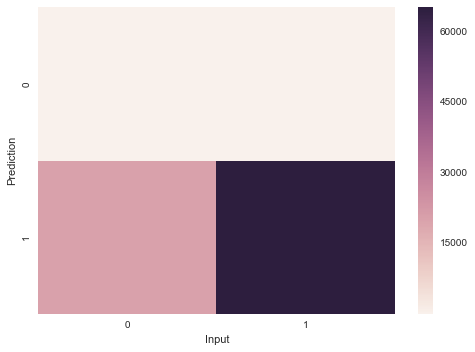

TEST SET:


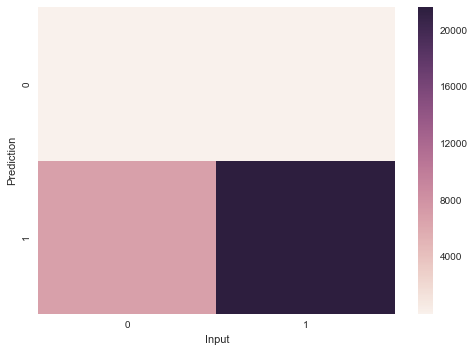

In [126]:
# Predictions on training
print("TRAINING SET:")
import seaborn as sns
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(clf.predict(X_train),y_train))
ax.set_xlabel('Input')
ax.set_ylabel('Prediction')
plt.show()

# Predictions on test
print("TEST SET:")
import seaborn as sns
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(clf.predict(X_test),y_test))
ax.set_xlabel('Input')
ax.set_ylabel('Prediction')
plt.show()